### Part i - Extract Data and Clean It

#### 1. Import libraries and set options

In [8]:
import os
import pandas as pd
from IPython.display import display
from fuzzywuzzy import process
pd.set_option('max_colwidth', 400)
import pickle
import missingno as msno

#### 2. Create Dataframes and clean data
##### 2.1 Match data Dataframe
Collate csv files, convert into lists and create first dataframe containing result data.

In [2]:
project_dir = os.path.dirname(os.path.abspath(''))
data_dir = os.path.join(project_dir, 'raw_data', 'dataset_1')

field_names = []
df_list = []

for root, _, files in os.walk(data_dir):
    for filenames in files:
        file_path = os.path.join(root, filenames)
        if field_names == []:
            field_names = pd.read_csv(file_path, nrows=0).columns.tolist()
        else:
            new_field_names = pd.read_csv(file_path, nrows=0).columns.tolist()
            for index, element in enumerate(field_names):
                if element != new_field_names[index]:
                    print(f"Field names don't match in {filenames}")
                    break   
        df_list.extend(pd.read_csv(file_path).values.tolist())

results_df = pd.DataFrame(df_list, columns=field_names)
display(results_df.head())

results_df.info()

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Perugia,Bologna,2-1,https://www.besoccer.com/match/perugia/bologna/2015164038,2015,1,serie_b
1,Avellino,Pro Vercelli,1-0,https://www.besoccer.com/match/us-avellino/us-pro-vercelli-calcio/2015164030,2015,1,serie_b
2,Catania,Virtus Lanciano,3-3,https://www.besoccer.com/match/catania/ss-virtus-lanciano-1924/2015164031,2015,1,serie_b
3,Crotone,Ternana Calcio,0-2,https://www.besoccer.com/match/fc-crotone/ternana-calcio/2015164032,2015,1,serie_b
4,Virtus Entella,SSC Bari,0-2,https://www.besoccer.com/match/virtus-entella/as-bari/2015164033,2015,1,serie_b


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146498 entries, 0 to 146497
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Home_Team  146498 non-null  object
 1   Away_Team  146498 non-null  object
 2   Result     146498 non-null  object
 3   Link       146498 non-null  object
 4   Season     146498 non-null  int64 
 5   Round      146498 non-null  int64 
 6   League     146498 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.8+ MB


Visualise missing data.

<AxesSubplot:>

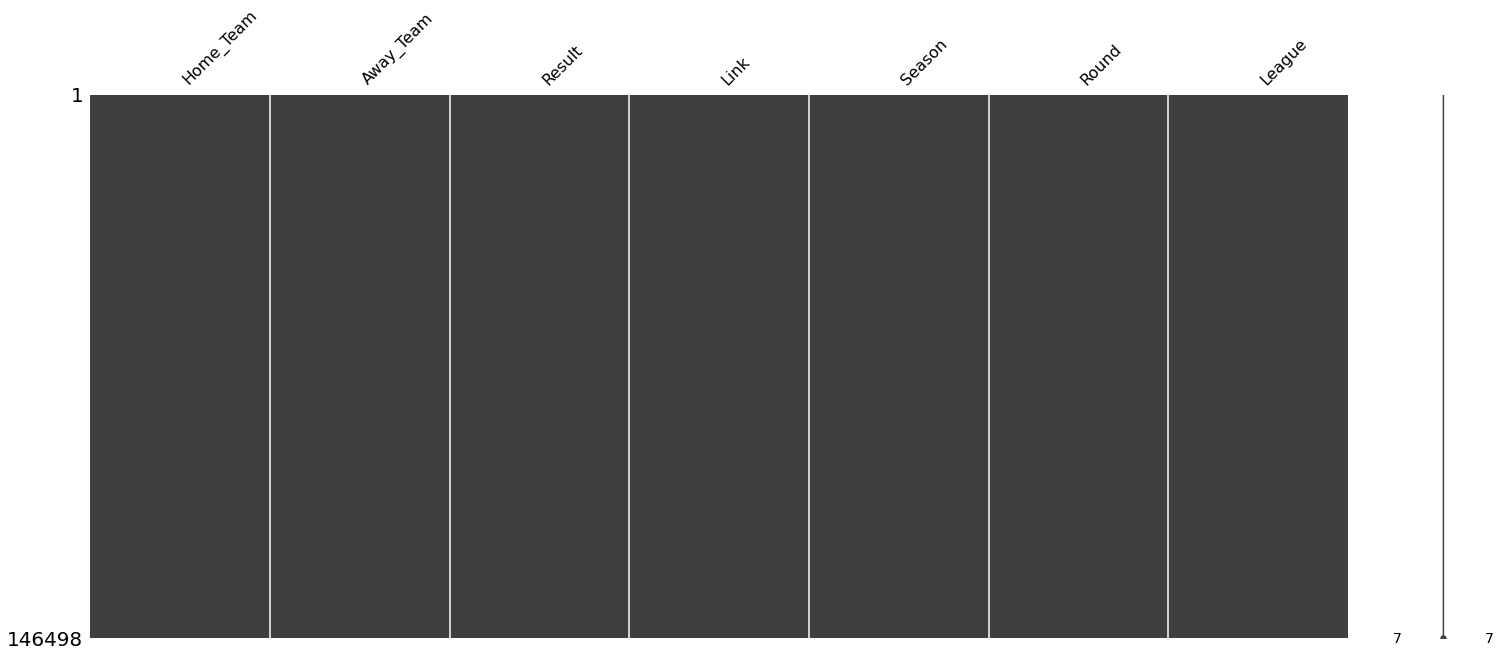

In [11]:
%matplotlib inline
msno.matrix(results_df)

Remove inconsistent information from link string.

In [ ]:
results_df['Link'] = results_df['Link'].apply(lambda x: x[:(x.rfind('/') + 5)])

Remove all duplicate entries.

In [ ]:
results_df.info()
results_df = results_df.drop_duplicates(subset='Link')
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146498 entries, 0 to 146497
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Home_Team  146498 non-null  object
 1   Away_Team  146498 non-null  object
 2   Result     146498 non-null  object
 3   Link       146498 non-null  object
 4   Season     146498 non-null  int64 
 5   Round      146498 non-null  int64 
 6   League     146498 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132109 entries, 0 to 146497
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Home_Team  132109 non-null  object
 1   Away_Team  132109 non-null  object
 2   Result     132109 non-null  object
 3   Link       132109 non-null  object
 4   Season     132109 non-null  int64 
 5   Round      132109 non-null  int64 
 6   League     132109 non-null  object
dtypes: in

**Findings:**
Based on the above, the results, season, round and league need to be validated and if applicable cleaned.

Team names and links will have to be assumed to be correct for now.

**Results** - Check scores validity and remove data if not in consistent format.

In [ ]:
possible_results = []
for i in range(20):
    for j in range(20):
        possible_results.append(f'{i}-{j}')
display(results_df.loc[~results_df['Result'].isin(possible_results)])
results_df = results_df.drop(results_df.loc[~results_df['Result'].isin(possible_results)].index)
display(results_df.loc[~results_df['Result'].isin(possible_results)])

,Home_Team,Away_Team,Result,Link,Season,Round,League
1118,Spezia,SSC Bari,3 (3-2) 2,https://www.besoccer.com/match/asd-spezia/as-bari/2013,2013,18,serie_b
1120,Cittadella,Varese,0 (0-1) 1,https://www.besoccer.com/match/as-cittadella/as-varese-1910/2013,2013,18,serie_b
45638,Marítimo,Sporting CP,1 (0-0) 1,https://www.besoccer.com/match/maritimo/sporting-lisbon/2013,2013,3,primeira_liga
91355,Aston Villa,Everton,17 JAN,https://www.besoccer.com/match/aston-villa-fc/everton-fc/2021,2021,19,premier_league
119078,PEC Zwolle,VVV Venlo,0 (0-0) 0,https://www.besoccer.com/match/fc-zwolle/vvv/2013,2013,15,eredivisie
133873,Strasbourg,PSG,18 MAR,https://www.besoccer.com/match/strasbourg/paris-saint-germain-fc/2020,2020,28,ligue_1


,Home_Team,Away_Team,Result,Link,Season,Round,League


**Team Names** - Confirm that there are no spurious/mis spelt team names (i.e. appearing less than 10 times).

In [ ]:
display(results_df[results_df.groupby('Home_Team')['Home_Team'].transform('size') < 10])

,Home_Team,Away_Team,Result,Link,Season,Round,League
24282,Uniao Lamas,Nacional,2-1,https://www.besoccer.com/match/uniao-lamas/nacional/2001,2001,1,segunda_liga
24283,FC Marco,CD Santa Clara,0-2,https://www.besoccer.com/match/fc-marco/santa-clara/2001,2001,1,segunda_liga
24290,SC Freamunde,Ovarense,1-2,https://www.besoccer.com/match/sc-freamunde/ovarense/2001,2001,1,segunda_liga
24592,SC Freamunde,Atlético CP,1-0,https://www.besoccer.com/match/sc-freamunde/atletico-cp/2015,2015,1,segunda_liga
24593,Vitória Guimarães B,Feirense,3-0,https://www.besoccer.com/match/vitoria-guimar/feirense/2015,2015,1,segunda_liga
...,...,...,...,...,...,...,...
66914,SC Telstar,Excelsior,1-3,https://www.besoccer.com/match/stormvogels-telstar/excelsior/2002,2002,1,eerste_divisie
67223,Jong AZ,SC Telstar,0-0,https://www.besoccer.com/match/az-alkmaar-sub23/stormvogels-telstar/2020,2020,1,eerste_divisie
67224,Jong PSV,Den Bosch,2-2,https://www.besoccer.com/match/jong-psv/fc-den-bosch/2020,2020,1,eerste_divisie
67513,SC Telstar,Go Ahead Eagles,2-3,https://www.besoccer.com/match/stormvogels-telstar/go-ahead-eagles/1999,1999,1,eerste_divisie


**Season, Round, League** - Confirm that the set of values is consistent and valid.

In [ ]:
print(set(results_df['Season']))
print(set(results_df['League']))
print(set(results_df['Round']))

{1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
{'premier_league', 'serie_b', 'primera_division', 'bundesliga', 'primeira_liga', 'championship', 'eredivisie', 'ligue_1', 'eerste_divisie', 'serie_a', '2_liga', 'segunda_division', 'ligue_2', 'segunda_liga'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}


##### 2.2 Match Info Dataframe
Convert csv files into dataframe containing match data.

In [12]:
data_dir = os.path.join(project_dir, 'raw_data', 'dataset_2')
match_csv = os.path.join(data_dir, 'Match_Info.csv')
match_df = pd.read_csv(match_csv)
display(match_df.head())
match_df.info()

,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,/match/saarbrucken/stuttgarter-kickers/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Jürgen Weber\r\n,0.0,0.0,3.0,0.0
1,/match/sc-freiburg/unterhaching/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Kurt Wittke\r\n,1.0,0.0,0.0,0.0
2,/match/vfl-osnabruck/meppen/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Werner Föckler\r\n,3.0,0.0,2.0,0.0
3,/match/rot-weiss-essen/schalke-04/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Heinz Werner\r\n,2.0,0.0,2.0,0.0
4,/match/alemannia-aachen/msv-duisburg/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Peter Dellwing\r\n,1.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143348 entries, 0 to 143347
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Link         143348 non-null  object 
 1   Date_New     143348 non-null  object 
 2   Referee      143348 non-null  object 
 3   Home_Yellow  122798 non-null  float64
 4   Home_Red     122798 non-null  float64
 5   Away_Yellow  122798 non-null  float64
 6   Away_Red     122798 non-null  float64
dtypes: float64(4), object(3)
memory usage: 7.7+ MB


Visualise missing data.

<AxesSubplot:>

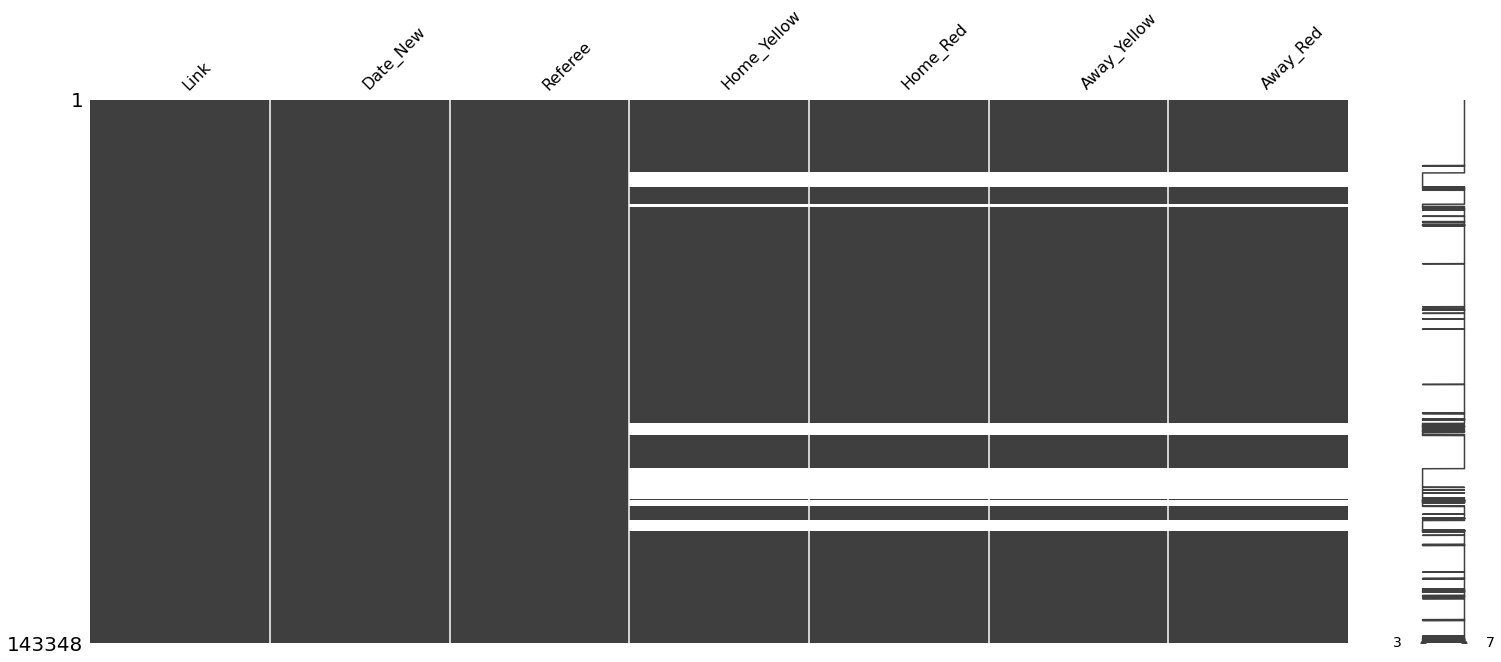

In [13]:
%matplotlib inline
msno.matrix(match_df)

Remove all duplicates.

In [ ]:
match_df.info()
match_df = match_df.drop_duplicates(subset='Link')
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143348 entries, 0 to 143347
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Link         143348 non-null  object 
 1   Date_New     143348 non-null  object 
 2   Referee      143348 non-null  object 
 3   Home_Yellow  122798 non-null  float64
 4   Home_Red     122798 non-null  float64
 5   Away_Yellow  122798 non-null  float64
 6   Away_Red     122798 non-null  float64
dtypes: float64(4), object(3)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 143348 entries, 0 to 143347
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Link         143348 non-null  object 
 1   Date_New     143348 non-null  object 
 2   Referee      143348 non-null  object 
 3   Home_Yellow  122798 non-null  float64
 4   Home_Red     122798 non-null  float64
 5   Away_Yellow  122798 non-null  float

**Findings:**
- Based on the above, the links are incomplete compared to the results df and will need manipulating so that the dfs can be joined.
- Card numbers need to be validated. There are several matches in which this dataset is incomplete. These will have to be left (approx 20k have null values)
- Referee strings need to be cleaned.
- Links need to be cleaned to match those in results_df.

**Cards** - Validate numbers of cards.

In [ ]:
print(set(match_df.loc[~match_df['Home_Yellow'].isna(), 'Home_Yellow']))
print(set(match_df.loc[~match_df['Home_Red'].isna(), 'Home_Red']))
print(set(match_df.loc[~match_df['Away_Yellow'].isna(), 'Away_Yellow']))
print(set(match_df.loc[~match_df['Away_Red'].isna(), 'Away_Red']))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
{0.0, 1.0, 2.0, 3.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
{0.0, 1.0, 2.0, 3.0, 4.0}


**Referee** - Clean up referee strings

In [ ]:
match_df['Referee'] = match_df['Referee'].replace('\r\n', '', regex=True)
display(match_df[match_df['Referee'].str.contains('\r\n')])
match_df.head()

,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red


,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,/match/saarbrucken/stuttgarter-kickers/1990,"Saturday, 29 July 1989, 15:00",Referee: Hans-Jürgen Weber,0.0,0.0,3.0,0.0
1,/match/sc-freiburg/unterhaching/1990,"Saturday, 29 July 1989, 15:00",Referee: Kurt Wittke,1.0,0.0,0.0,0.0
2,/match/vfl-osnabruck/meppen/1990,"Saturday, 29 July 1989, 15:00",Referee: Werner Föckler,3.0,0.0,2.0,0.0
3,/match/rot-weiss-essen/schalke-04/1990,"Saturday, 29 July 1989, 15:00",Referee: Heinz Werner,2.0,0.0,2.0,0.0
4,/match/alemannia-aachen/msv-duisburg/1990,"Saturday, 29 July 1989, 15:00",Referee: Hans-Peter Dellwing,1.0,0.0,1.0,0.0


Check links in the results df are in the match_df by standardising link string.

In [ ]:
match_df['Link'] = 'https://www.besoccer.com' + match_df['Link']
match_df['Link'] = match_df['Link'].replace('match_\w+/', 'match/', regex=True)

##### 2.3 Team Info Dataframe
Convert csv files into dataframe containing team info data.

In [3]:
data_dir = os.path.join(project_dir, 'raw_data', 'dataset_2')
team_csv = os.path.join(data_dir, 'Team_Info.csv')
team_df = pd.read_csv(team_csv)
display(team_df.head())
print(team_df.info())

,Team,City,Country,Stadium,Capacity,Pitch
0,Wattenscheid 09,Bochum-Wattenscheid,Germany,Lohrheidestadion,16233,Natural
1,Hertha BSC,Berlín,Germany,Olympiastadion Berlin,76065,Natural
2,Unterhaching,Unterhaching,Germany,Sportpark Unterhaching,15053,Natural
3,Fortuna Köln,Cologne,Germany,Südstadion,14944,Natural
4,MSV Duisburg,Duisburgo,Germany,Schauinsland-Reisen-Arena,31514,Natural


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      544 non-null    object
 1   City      544 non-null    object
 2   Country   544 non-null    object
 3   Stadium   447 non-null    object
 4   Capacity  544 non-null    object
 5   Pitch     447 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB
None


Visualise missing data.

<AxesSubplot:>

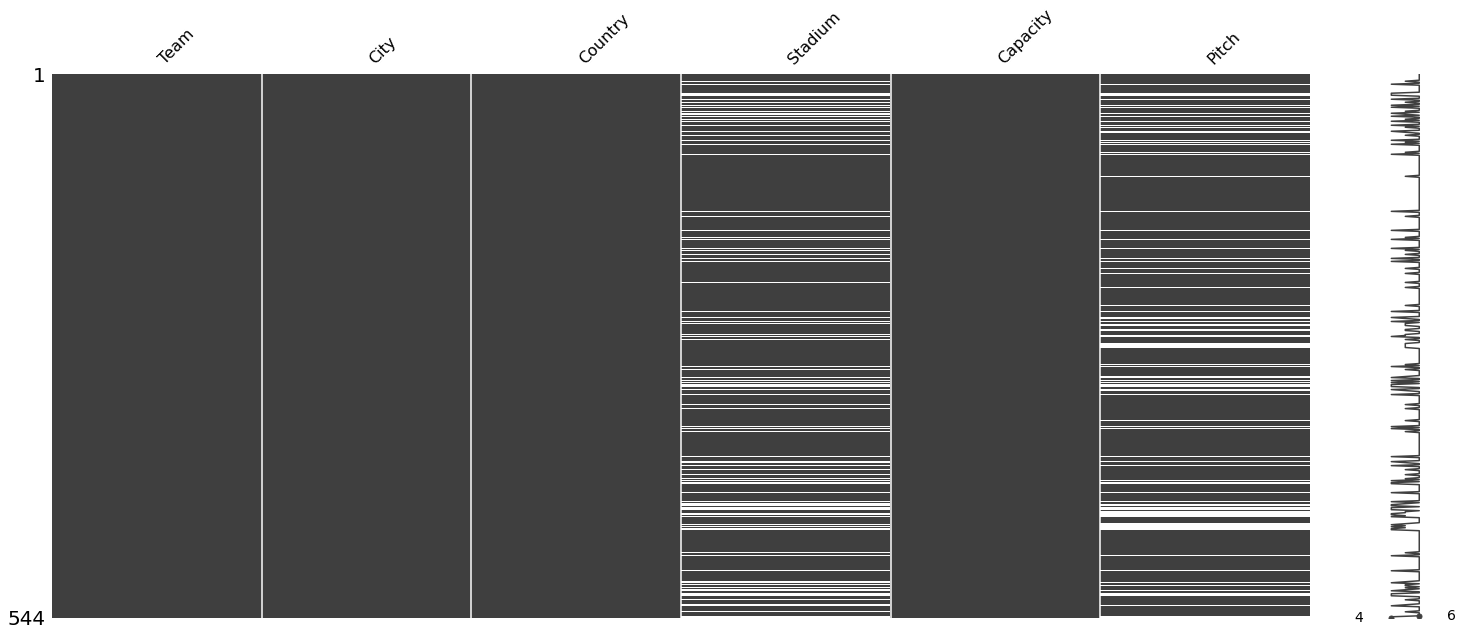

In [14]:
%matplotlib inline
msno.matrix(team_df)

Remove all duplicates.

In [ ]:
team_df.info()
team_df = team_df.drop_duplicates(subset='Team')
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      544 non-null    object
 1   City      544 non-null    object
 2   Country   544 non-null    object
 3   Stadium   447 non-null    object
 4   Capacity  544 non-null    object
 5   Pitch     447 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      544 non-null    object
 1   City      544 non-null    object
 2   Country   544 non-null    object
 3   Stadium   447 non-null    object
 4   Capacity  544 non-null    object
 5   Pitch     447 non-null    object
dtypes: object(6)
memory usage: 29.8+ KB


**Findings:**
- Based on the above, the country and pitch need to be validated and if applicable cleaned.
- City, team names, capacity and stadium will have to be assumed to be correct for now.

**Country** - Check countries are applicable and valid.

In [ ]:
print(set(team_df['Country']))

{'Italy', 'France', 'England', 'Spain', 'Netherlands', 'Portugal', 'Germany'}


**Pitch** - Standardise entries for pitch type.

In [ ]:
print(set(team_df['Pitch']))
list_to_update = ['cesped real', 'Grass', 'Césped Natural', 'Cesped natural', 'NATURAL', 'Natural grass', 'Césped', 'Césped natural', 'natural', 'natural grass', 'cesped natural', 'grass']
team_df.loc[team_df['Pitch'].isin(list_to_update), 'Pitch'] = 'Natural'
team_df.loc[team_df['Pitch'] == 'Césped Artificial', 'Pitch'] = 'Artificial'
print(set(team_df['Pitch']))

{nan, 'grass', 'Grass', 'cesped natural', 'Cesped natural', 'AirFibr ', 'natural grass', 'Artificial', 'Natural grass', 'natural', 'Césped natural', 'NATURAL', 'Césped Artificial', 'Natural', 'Césped Natural', 'cesped real', 'Césped'}
{'Natural', nan, 'AirFibr ', 'Artificial'}


#### 3 Combine Datasets
##### 3.1 Compare Datasets and Clean
Find results with teams not in team_df.
Create dictionary of team names to be replaced.

In [ ]:
not_found_home = set(results_df[~results_df['Home_Team'].isin(team_df['Team'])]['Home_Team'])
not_found_away = set(results_df[~results_df['Away_Team'].isin(team_df['Team'])]['Away_Team'])
print(not_found_home == not_found_away)
print(not_found_home)

True
{'SV Wehen Burghausen', 'Würzburger Kickers', 'Queens Park Rangers', 'CS Louhans Cuiseaux', 'AS Lucchese Libertas 1905', 'FC Libourne Saint Seurin', 'West Bromwich Albion', 'SV Wacker Burghausen', 'Eintracht Frankfurt', 'FC Carl Zeiss Jena', 'Oldham Athletic AFC', '1. FC Lokomotive Leipzig', 'Olympique Marseille', 'SV Eintracht Trier', 'Gimnàstic Tarragona', 'Barletta', 'B. Mönchengladbach', 'Blau-Weiß 1890 Berlin', 'Stuttgarter Kickers', 'Siegen Sportfreunde ', 'Sporting Toulon Var', 'Vitória Guimarães', 'Licata', 'Casertana', 'Taranto', 'Calcio Portogruaro-Summaga', 'Sheffield Wednesday', 'Evian Thonon Gaillard', 'Vitória Guimarães B', 'Real Unión de Irún', 'Peterborough United', 'Fortuna Düsseldorf', 'Brighton & Hove Albion', 'Rot-Weiß Oberhausen', 'Kickers Offenbach FC', 'Paços de Ferreira'}


In [ ]:
team_list = list(set(team_df['Team'].to_list()))
teams_to_change = {}

for team in not_found_home:
    teams_to_change[team] = process.extractOne(team, team_list)[0]
teams_to_change

{'SV Wehen Burghausen': 'Wehen Burghausen',
 'Würzburger Kickers': 'Würzburger',
 'Queens Park Rangers': 'Queens Park Range.',
 'CS Louhans Cuiseaux': 'Louhans Cuiseaux',
 'AS Lucchese Libertas 1905': 'Lucchese Libertas',
 'FC Libourne Saint Seurin': 'Leça FC',
 'West Bromwich Albion': 'West Bromwich Alb.',
 'SV Wacker Burghausen': 'Wacker Burghausen',
 'Eintracht Frankfurt': 'Eintracht',
 'FC Carl Zeiss Jena': 'Carl Zeiss Jena',
 'Oldham Athletic AFC': 'Oldham Athletic',
 '1. FC Lokomotive Leipzig': 'Lokomotive Leipzig',
 'Olympique Marseille': 'Olympique',
 'SV Eintracht Trier': 'Eintracht Trier',
 'Gimnàstic Tarragona': 'Gimnàstic',
 'Barletta': 'Arles',
 'B. Mönchengladbach': 'Mönchengladbach',
 'Blau-Weiß 1890 Berlin': 'Blau-Weiß 1890 B.',
 'Stuttgarter Kickers': 'Stuttgarter',
 'Siegen Sportfreunde ': 'Siegen',
 'Sporting Toulon Var': 'Sporting Toulon',
 'Vitória Guimarães': 'Vitória',
 'Licata': 'Alicante',
 'Casertana': 'Catania',
 'Taranto': 'Atalanta',
 'Calcio Portogruaro-Su

Pop team names that are incorrectly matched. And then update the dictionary.

In [ ]:
keys_to_drop = {
    'Licata': 'Alicante',
    'Casertana': 'Catania',
    'Barletta': 'Arles',
    'Taranto': 'Atalanta',
    'Calcio Portogruaro-Summaga': 'Calcio',
    'FC Libourne Saint Seurin': 'Paris FC'}

for k in keys_to_drop.keys():
    teams_to_change.pop(k)

In [ ]:
values_to_update = {"Home_Team": teams_to_change}
results_df.replace(values_to_update, inplace=True)
values_to_update = {"Away_Team": teams_to_change}
results_df.replace(values_to_update, inplace=True)
not_found_home = set(results_df[~results_df['Home_Team'].isin(team_df['Team'])]['Home_Team'])
print(not_found_home)

{'Calcio Portogruaro-Summaga', 'Licata', 'Casertana', 'FC Libourne Saint Seurin', 'Taranto', 'Barletta'}


As there are 3503 unmatched links out 146000 data entries, these unmatched links can be dropped. Matching these would otherwise be too computationally/time expensive.

##### 3.2 Merge Datasets
Merge as follows:
- Pull in team_df into results_df
- Pull in match_df into results_df

In [ ]:
team_df = team_df.rename(columns={'Team' : 'Home_Team'})

In [ ]:
df = pd.merge(results_df, match_df, on='Link', how='left')
df = pd.merge(df, team_df, on='Home_Team', how='left')
display(df.head())
print(df.info())

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch
0,Perugia,Bologna,2-1,https://www.besoccer.com/match/perugia/bologna/2015,2015,1,serie_b,"Friday, 29 August 2014, 20:30",Referee: Claudio Gavillucci,4.0,0.0,4.0,2.0,Perugia,Italy,Stadio Renato Curi,28000,Natural
1,Avellino,Pro Vercelli,1-0,https://www.besoccer.com/match/us-avellino/us-pro-vercelli-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Ivano Pezzuto,2.0,0.0,4.0,1.0,Avellino,Italy,Stadio Partenio,10215,Natural
2,Catania,Virtus Lanciano,3-3,https://www.besoccer.com/match/catania/ss-virtus-lanciano-1924/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Daniele Minelli,6.0,1.0,3.0,1.0,Catania,Italy,Stadio Angelo Massimino,23420,Natural
3,Crotone,Ternana Calcio,0-2,https://www.besoccer.com/match/fc-crotone/ternana-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Maurizio Mariani,5.0,0.0,4.0,0.0,Crotone,Italy,Ezio Scida,16640,Natural
4,Virtus Entella,SSC Bari,0-2,https://www.besoccer.com/match/virtus-entella/as-bari/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Leonardo Baracani,2.0,0.0,2.0,0.0,Chiavari,Italy,Stadio Comunale Chiavari,4154,Artificial


<class 'pandas.core.frame.DataFrame'>
Int64Index: 132103 entries, 0 to 132102
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Home_Team    132103 non-null  object 
 1   Away_Team    132103 non-null  object 
 2   Result       132103 non-null  object 
 3   Link         132103 non-null  object 
 4   Season       132103 non-null  int64  
 5   Round        132103 non-null  int64  
 6   League       132103 non-null  object 
 7   Date_New     128601 non-null  object 
 8   Referee      128601 non-null  object 
 9   Home_Yellow  111865 non-null  float64
 10  Home_Red     111865 non-null  float64
 11  Away_Yellow  111865 non-null  float64
 12  Away_Red     111865 non-null  float64
 13  City         131911 non-null  object 
 14  Country      131911 non-null  object 
 15  Stadium      125549 non-null  object 
 16  Capacity     131911 non-null  object 
 17  Pitch        125794 non-null  object 
dtypes: float64(4), int64(2),

##### 3.2 Update with ELO data
Create new dataframe with ELO data and common links

In [ ]:
elo_dict = pickle.load(open(os.path.join(project_dir, 'raw_data', 'elo_dict.pkl'), 'rb'))

In [ ]:
elo_df = pd.DataFrame.from_dict(elo_dict, orient='index')
elo_df = elo_df.reset_index(level=0)
elo_df = elo_df.rename(columns={'index': 'Link'})
elo_df['Link'] = elo_df['Link'].apply(lambda x: x[:(x.rfind('/') + 5)])
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132111 entries, 0 to 132110
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Link      132111 non-null  object 
 1   Elo_home  122314 non-null  float64
 2   Elo_away  122314 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB


Drop duplicate values.

In [ ]:
elo_df.info()
elo_df = elo_df.drop_duplicates()
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132111 entries, 0 to 132110
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Link      132111 non-null  object 
 1   Elo_home  122314 non-null  float64
 2   Elo_away  122314 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132107 entries, 0 to 132110
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Link      132107 non-null  object 
 1   Elo_home  122314 non-null  float64
 2   Elo_away  122314 non-null  float64
dtypes: float64(2), object(1)
memory usage: 4.0+ MB


In [ ]:
df = pd.merge(df, elo_df, on='Link', how='left')
display(df.head())
print(df.info())

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Elo_home,Elo_away
0,Perugia,Bologna,2-1,https://www.besoccer.com/match/perugia/bologna/2015,2015,1,serie_b,"Friday, 29 August 2014, 20:30",Referee: Claudio Gavillucci,4.0,0.0,4.0,2.0,Perugia,Italy,Stadio Renato Curi,28000,Natural,46.0,67.0
1,Avellino,Pro Vercelli,1-0,https://www.besoccer.com/match/us-avellino/us-pro-vercelli-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Ivano Pezzuto,2.0,0.0,4.0,1.0,Avellino,Italy,Stadio Partenio,10215,Natural,56.0,54.0
2,Catania,Virtus Lanciano,3-3,https://www.besoccer.com/match/catania/ss-virtus-lanciano-1924/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Daniele Minelli,6.0,1.0,3.0,1.0,Catania,Italy,Stadio Angelo Massimino,23420,Natural,67.0,48.0
3,Crotone,Ternana Calcio,0-2,https://www.besoccer.com/match/fc-crotone/ternana-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Maurizio Mariani,5.0,0.0,4.0,0.0,Crotone,Italy,Ezio Scida,16640,Natural,60.0,53.0
4,Virtus Entella,SSC Bari,0-2,https://www.besoccer.com/match/virtus-entella/as-bari/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Leonardo Baracani,2.0,0.0,2.0,0.0,Chiavari,Italy,Stadio Comunale Chiavari,4154,Artificial,40.0,60.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 132103 entries, 0 to 132102
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Home_Team    132103 non-null  object 
 1   Away_Team    132103 non-null  object 
 2   Result       132103 non-null  object 
 3   Link         132103 non-null  object 
 4   Season       132103 non-null  int64  
 5   Round        132103 non-null  int64  
 6   League       132103 non-null  object 
 7   Date_New     128601 non-null  object 
 8   Referee      128601 non-null  object 
 9   Home_Yellow  111865 non-null  float64
 10  Home_Red     111865 non-null  float64
 11  Away_Yellow  111865 non-null  float64
 12  Away_Red     111865 non-null  float64
 13  City         131911 non-null  object 
 14  Country      131911 non-null  object 
 15  Stadium      125549 non-null  object 
 16  Capacity     131911 non-null  object 
 17  Pitch        125794 non-null  object 
 18  Elo_home     122310 non-

##### 3.3 Final Clean of Data
Now dataset has been merged and is complete, remove all remaining unreliable data for the features that matter.

In [ ]:
df = df.dropna(axis=0, subset=['Date_New', 'Capacity', 'Elo_home', 'Elo_away', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105540 entries, 0 to 131799
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Home_Team    105540 non-null  object 
 1   Away_Team    105540 non-null  object 
 2   Result       105540 non-null  object 
 3   Link         105540 non-null  object 
 4   Season       105540 non-null  int64  
 5   Round        105540 non-null  int64  
 6   League       105540 non-null  object 
 7   Date_New     105540 non-null  object 
 8   Referee      105540 non-null  object 
 9   Home_Yellow  105540 non-null  float64
 10  Home_Red     105540 non-null  float64
 11  Away_Yellow  105540 non-null  float64
 12  Away_Red     105540 non-null  float64
 13  City         105540 non-null  object 
 14  Country      105540 non-null  object 
 15  Stadium      101639 non-null  object 
 16  Capacity     105540 non-null  object 
 17  Pitch        101391 non-null  object 
 18  Elo_home     105540 non-

Remove teams that aren't consistent across home team and away team lists.

In [ ]:
away_not_in_home = set(df[~df['Away_Team'].isin(df['Home_Team'])]['Away_Team'])
print(away_not_in_home)
df.drop(df[df['Away_Team'].isin(away_not_in_home)].index, inplace=True)

home_not_in_away = set(df[~df['Home_Team'].isin(df['Away_Team'])]['Home_Team'])
print(home_not_in_away)
df.drop(df[df['Home_Team'].isin(home_not_in_away)].index, inplace=True)
df

{'Oriental Lisboa', 'Carregado', 'Vilafranquense', 'Real Unión Irún', 'Alcoyano', 'Casa Pia', 'Villarreal B', 'FC Libourne Saint Seurin', 'Pontevedra', 'Calcio Portogruaro-Summaga', 'Achilles 29', 'Fafe'}
{'Real Sport Clube', 'Jong Twente', 'Poli Ejido', 'Racing Paris'}


,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Elo_home,Elo_away
0,Perugia,Bologna,2-1,https://www.besoccer.com/match/perugia/bologna/2015,2015,1,serie_b,"Friday, 29 August 2014, 20:30",Referee: Claudio Gavillucci,4.0,0.0,4.0,2.0,Perugia,Italy,Stadio Renato Curi,28000,Natural,46.0,67.0
1,Avellino,Pro Vercelli,1-0,https://www.besoccer.com/match/us-avellino/us-pro-vercelli-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Ivano Pezzuto,2.0,0.0,4.0,1.0,Avellino,Italy,Stadio Partenio,10215,Natural,56.0,54.0
2,Catania,Virtus Lanciano,3-3,https://www.besoccer.com/match/catania/ss-virtus-lanciano-1924/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Daniele Minelli,6.0,1.0,3.0,1.0,Catania,Italy,Stadio Angelo Massimino,23420,Natural,67.0,48.0
3,Crotone,Ternana Calcio,0-2,https://www.besoccer.com/match/fc-crotone/ternana-calcio/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Maurizio Mariani,5.0,0.0,4.0,0.0,Crotone,Italy,Ezio Scida,16640,Natural,60.0,53.0
4,Virtus Entella,SSC Bari,0-2,https://www.besoccer.com/match/virtus-entella/as-bari/2015,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Leonardo Baracani,2.0,0.0,2.0,0.0,Chiavari,Italy,Stadio Comunale Chiavari,4154,Artificial,40.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131729,Real Zaragoza,Sevilla,1-2,https://www.besoccer.com/match/real-zaragoza/sevilla/1994,1994,1,primera_division,"Sunday, 05 September 1993, 00:00",Referee: Manuel Díaz Vega,3.0,0.0,3.0,0.0,Zaragoza,Spain,La Romareda,34596,Natural,83.0,82.0
131730,Deportivo,Celta,0-0,https://www.besoccer.com/match/deportivo/celta/1994,1994,1,primera_division,"Sunday, 05 September 1993, 00:00",Referee: Juan Ansuategui Roca,1.0,0.0,4.0,0.0,La Coruña,Spain,Municipal Riazor,34600,Natural,80.0,74.0
131751,Real Oviedo,Real Sporting,0-1,https://www.besoccer.com/match/real-oviedo/sporting-gijon/1994,1994,3,primera_division,"Sunday, 19 September 1993, 00:00",Referee: Antonio Martin Navarrete,2.0,0.0,2.0,0.0,Oviedo,Spain,Carlos Tartiere,30500,Natural,78.0,81.0
131782,CD Logroñés,Athletic,4-2,https://www.besoccer.com/match/logrones-cd/athletic-bilbao/1994,1994,6,primera_division,"Thursday, 07 October 1993, 00:00",Referee: Antonio López Nieto,2.0,0.0,3.0,0.0,Logroño,Spain,NaN,"16,000",Natural,77.0,82.0


#### 4 Export Dataset
Save to json file

In [ ]:
df.to_json(os.path.join(project_dir, 'cleaned_dataset.json'))